# <center>Hybrid Images</center>

## Introduction

In [1]:
from scipy.signal import convolve2d, correlate2d, gaussian
import numpy as np
import cv2
import matplotlib.pylab as plt

In [2]:
def visualize_image(figure_name: str, img: np.ndarray):
    cv2.imshow(figure_name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
img = cv2.imread('./data/dog.bmp')
visualize_image('original', img)
img2 = cv2.imread('./data/cat.bmp')
visualize_image('original', img2)

In [4]:
def create_gaussian_filter(ksize, sigma):
    # create gaussian filter of an arbitrary MxN dimensions
    kernel1 = gaussian(ksize[0],sigma)
    kernel2 = gaussian(ksize[1],sigma)
    kernel2D = np.outer(kernel1,kernel2)
    # Normalize the kernel values
    return (kernel2D)/(np.sum(kernel2D))

In [5]:
# TODO: Test your functions with `correlate2d()`
kernel = create_gaussian_filter((19,19),500)
my_blur = np.array(img)
my_blur[:,:,0] = correlate2d(img[:,:,0], kernel, 'same')
my_blur[:,:,1] = correlate2d(img[:,:,1], kernel, 'same')
my_blur[:,:,2] = correlate2d(img[:,:,2], kernel, 'same')
visualize_image('my gaussian blur', my_blur)

In [10]:
import helpers
helpers.vis_hybrid_image(final)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 3 and the array at index 1 has size 2

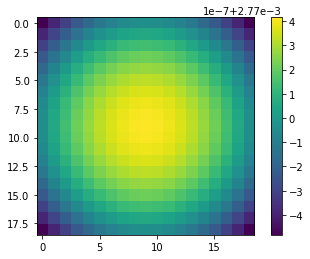

In [6]:
plt.imshow(kernel)
plt.colorbar()
plt.show()

In [7]:
# TODO: Test your functions with `correlate2d()`
kernel = create_gaussian_filter((19,19),1000)
my_blur2 = np.array(img2)
my_blur2[:,:,0] = correlate2d(img2[:,:,0], kernel, 'same')
my_blur2[:,:,1] = correlate2d(img2[:,:,1], kernel, 'same')
my_blur2[:,:,2] = correlate2d(img2[:,:,2], kernel, 'same')
test = img2-my_blur2
test = (test+128.0)%255
visualize_image('my gaussian blur', np.uint8(test))

In [8]:
final = np.clip((test+my_blur-128),0,255)
visualize_image('RED WHEELBARROW', np.uint8(final))

In [275]:
final.dtype

dtype('float64')

## Results

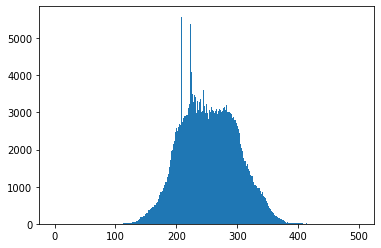

In [272]:
#test = (((test+127)%255))
plt.hist((test+my_blur).ravel(),500,[0,500]);
plt.show()

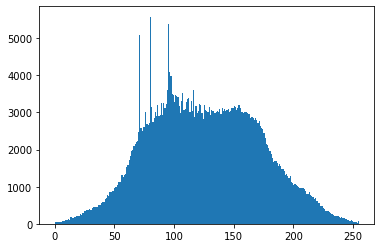

In [273]:
#test = (((test+127)%255))
plt.hist((test+my_blur-128).ravel(),255,[0,255]);
plt.show()

In [228]:
test[0,0,0]

218.0

In [229]:
my_blur[0,0,0]

70

In [271]:
test[0,0,0]+my_blur[0,0,0]

301.0